<a href="https://colab.research.google.com/github/laplezeda/neural-network-from-scratch/blob/main/california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **In this file we will be predicting caliifornia housin prices using neural network**

## lets start by importing the database and the required python libraries

### importing python libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### importing and splitting the dataset

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target , random_state = 42)
X_train , X_valid , y_train , y_valid = train_test_split(X_train_full , y_train_full , random_state=42)

## conducting a check

In [ ]:
len(X_train)

11610

In [ ]:
len(X_valid)

3870

In [ ]:
len(X_train_full)

15480

In [ ]:
len(X_test)

5160

In [ ]:
#creatin a dataframe for x_train
df_train = pd.DataFrame(X_train, columns=housing.feature_names)
#printing the dataframe
print(df_train.head())

   MedInc  HouseAge  AveRooms  ...  AveOccup  Latitude  Longitude
0  3.5214      15.0  3.049945  ...  1.605993     37.63    -122.43
1  5.3275       5.0  6.490060  ...  3.443340     33.69    -117.39
2  3.1000      29.0  7.542373  ...  2.250847     38.44    -122.98
3  7.1736      12.0  6.289003  ...  2.695652     33.55    -117.70
4  2.0549      13.0  5.312457  ...  2.244384     33.93    -116.93

[5 rows x 8 columns]


## standardizing the data

In [ ]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_valid = scale.transform(X_valid)
X_test = scale.transform(X_test)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

## now lets define the model architechture

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30 , activation = "relu" , input_shape = X_train.shape[1:] ),
    keras.layers.Dense(10 , activation = "relu" ),
    keras.layers.Dense(1)
])

model.compile(loss= "mean_squared_error",
              optimizer = keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train , y_train ,epochs = 20 , validation_data = (X_valid,y_valid))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.2427 - val_loss: 0.7518
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7192 - val_loss: 0.6149
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6437 - val_loss: 0.5518
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5957 - val_loss: 0.5133
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5611 - val_loss: 0.4878
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5345 - val_loss: 0.4697
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5141 - val_loss: 0.4579
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4981 - val_loss: 0.4509
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4850 - val_loss: 0.4470
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4742 - val_loss: 0.4454
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4653 - val_loss: 0.4454
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.

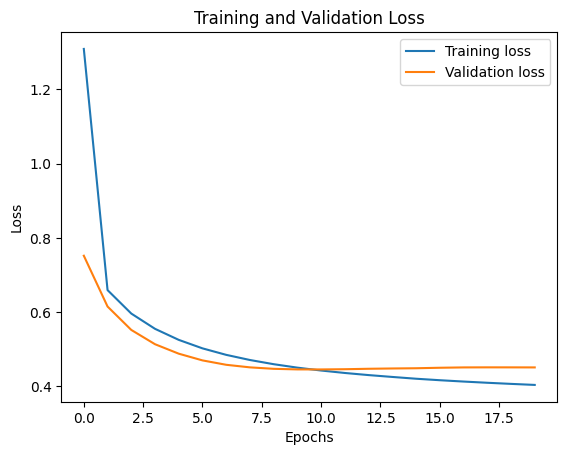

In [ ]:
# Plot the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

## now lets evaluate the models testing performance

In [ ]:
# Evaluate the model on the test set
mse_test = model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3960


In [ ]:
# Make predictions on new data
X_new = X_test[:3]
y_pred = model.predict(X_new)

# Compare predictions with actual values
for i in range(len(X_new)):
    print(f"Sample {i+1}:")
    print(f"Predicted: {y_pred[i][0]*10000}")
    print(f"Actual: {y_test[i]*10000}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Sample 1:
Predicted: 6266.33349609375
Actual: 4770.0
Sample 2:
Predicted: 15667.3076171875
Actual: 4580.0
Sample 3:
Predicted: 34856.01953125
Actual: 50000.1
